# 贝叶斯分类实现根据睡眠状况进行病例诊断
***
## 首先导入必要的工具包

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## 读取训练数据集和验证数据集

In [2]:
trains = pd.read_csv("train.csv")
trains[:5] # 展示前5行

,Age,Sex,Diagnosis,Sleep quality,Sleep latency,Sleep time,Sleep efficiency,Sleep disorder,Hypnagogue,Daytime dyfunction
0,25,female,Depression,3,3,2,3,2,0,2
1,51,female,Depression,3,3,3,3,3,3,3
2,24,female,Depression,2,2,2,2,2,0,1
3,60,male,Depression,3,3,3,3,2,0,2
4,54,female,Depression,3,3,3,3,2,3,2


In [3]:
validates = pd.read_csv("validate.csv")
validates[:5] # 前5行

,Age,Sex,Diagnosis,Sleep quality,Sleep latency,Sleep time,Sleep efficiency,Sleep disorder,Hypnagogue,Daytime dyfunction
0,63,female,Depression,1,1,1,1,0,2,0
1,30,female,Depression,3,3,3,3,3,3,2
2,26,male,Depression,2,0,1,2,2,0,2
3,61,male,Depression,3,3,3,3,2,0,1
4,19,female,Sleep disorder,3,3,3,3,1,0,1


## 首先进行分析数据的基本特性
***
1. 先分析每种病各有多少人

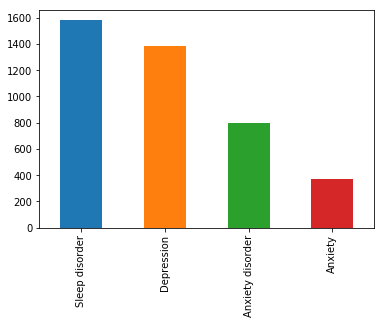

In [4]:
trains.Diagnosis.value_counts().plot(kind="bar")

In [5]:
trains.describe() # 查看普遍统计情况

,Age,Sleep quality,Sleep latency,Sleep time,Sleep efficiency,Sleep disorder,Hypnagogue,Daytime dyfunction
count,4134.000000,4134.000000,4134.000000,4134.000000,4134.000000,4134.000000,4134.000000,4134.000000
mean,39.968553,2.213111,2.309386,1.991534,2.093372,1.604257,1.141509,1.153362
std,14.109574,0.800624,0.881195,1.050699,1.042058,0.683454,1.355350,0.988779
min,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000
50%,38.000000,2.000000,3.000000,2.000000,2.000000,2.000000,0.000000,1.000000
75%,51.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,2.000000
max,87.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
